<a href="https://colab.research.google.com/github/ignaciosticco/HOgit/blob/master/hdf_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition with TensorFlow

**Project Objective:**

The objective of this project is to conduct a comparative analysis between the TensorFlow approach and the "from scratch approach." To ensure a fair comparison, the number of epochs is set to 1, and Stochastic Gradient Descent (SGD) is utilized instead of ADAM optimizer, aiming to maintain consistency across both methodologies.

**Experimental Setup:**

Efforts were made to replicate the conditions of the Handwritten Digit Recognition (HDR) project conducted from scratch.

In [37]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
from PIL import Image,ImageEnhance, ImageOps

In [38]:
# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
# Function to plot numbers
def draw_number(array_digit, subplot_index):
    '''
    Plots a digit given a 28x28 array that represents a handwritten digit.
    '''
    plt.subplot(subplot_index)
    grid = array_digit.reshape((28, 28))
    plt.imshow(grid, cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])

## Test a few examples

In [40]:
# Architecture definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation = 'sigmoid'),
    tf.keras.layers.Dense(100, activation = 'sigmoid'),
    tf.keras.layers.Dense(10)
    #tf.keras.layers.Dense(10, activation = 'softmax')
])

In [41]:
# Compiling the model with SGD optimizer
alpha = 0.001
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=alpha)
model.compile(optimizer=sgd_optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [42]:
# Fitting the model!
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 8s 4ms/step - loss: 2.1223 - accuracy: 0.3952


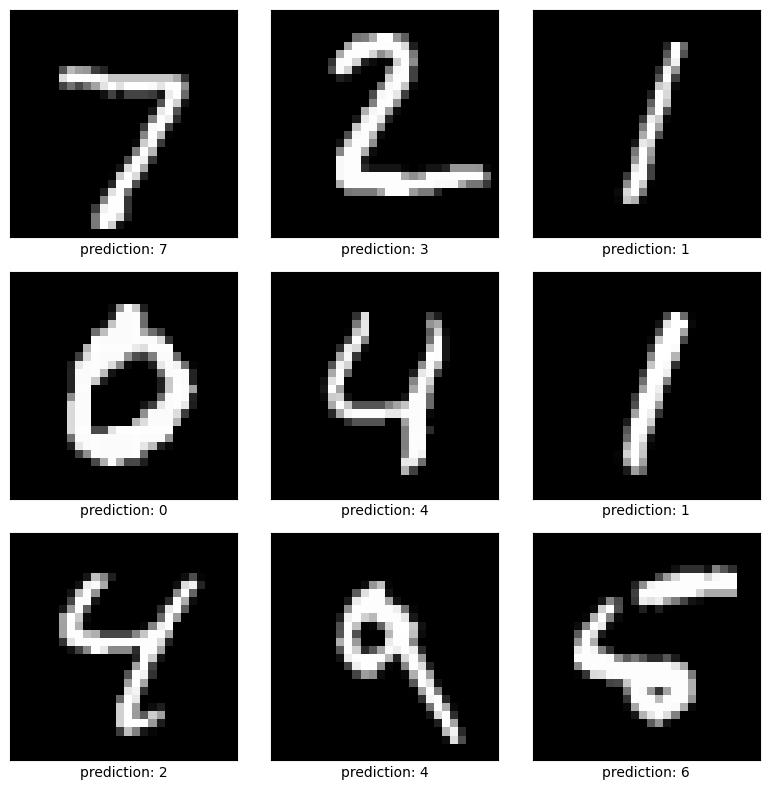

In [43]:
# Plot examples
plt.figure(figsize=(8, 8))
for i in range(9):
    draw_number(x_test[i:i+1], 331 + i)
    plt.xlabel('prediction: {}'.format( model(x_test[i:i+1]).numpy().argmax()))

plt.tight_layout()  # Adjust layout
plt.show()


## Calculate Learning curves

In [34]:
# Calculate Learning Curves

trainingsize_list = [100,500,1000,3000,5000,10000]
training_curve = []
testing_curve = []

for n in trainingsize_list:
    # Define your model here

    # Recompile the model for each iteration
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    # Training curve
    x_train_tmp = x_train[:n]
    y_train_tmp = y_train[:n]
    model.fit(x_train_tmp, y_train_tmp, epochs=1)

    predictions_train = model.predict(x_train_tmp)
    train_loss = loss_fn(y_train_tmp, predictions_train).numpy()
    training_curve+=[train_loss]

    # Testing curve
    x_test_tmp = x_test[:n]
    y_test_tmp = y_test[:n]
    predictions_test = model.predict(x_test_tmp)
    test_loss = loss_fn(y_test_tmp, predictions_test).numpy()
    #print("Cross-entropy loss for n =", n, ":", test_loss)

    testing_curve+=[test_loss]


313/313 [==============================] - 1s 2ms/step


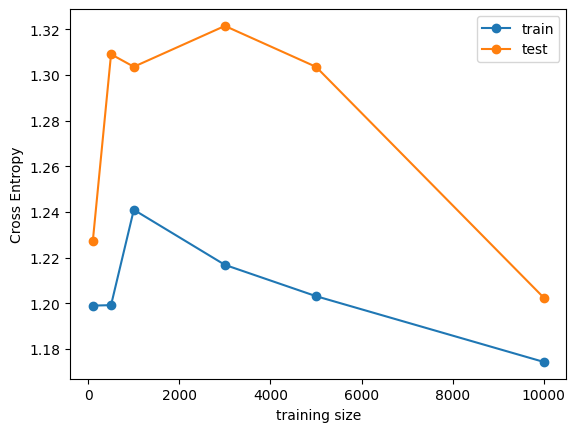

In [35]:
# Plot learning curves
plt.plot(trainingsize_list, training_curve, '-o', label = 'train')
plt.plot(trainingsize_list, testing_curve, '-o', label = 'test')
plt.xlabel('training size')
plt.ylabel('Cross Entropy')
plt.legend()

## Conclusions

1) The qualitative trends observed in the learning curves closely resemble those of the HDR project conducted from scratch (HDRFS).

2) The achieved accuracy hovers around 0.8 for the maximum training set size, mirroring results obtained in the HDRFS project.

3) Due to the utilization of only one epoch and SGD optimizer, the solution exhibits a degree of instability.

4) The implementation of this project, in contrast to the from-scratch method, was notably straightforward. Therefore, the next steps are:

- incorporating additional epochs.
- employing more advanced optimizers